In [1]:
import regions

In [2]:
fov = regions.Regions.read('/orange/adamginsburg/cmz/sgre/sgre_approxbox.reg')

In [3]:
from astroquery.vizier import Vizier

In [4]:
coord = fov[0].center
height = fov[0].height
width = fov[0].width
height, width = width, height # CARTA wrote it wrong
coord, width, height

(<SkyCoord (ICRS): (ra, dec) in deg
     (265.81250666, -29.82777753)>,
 <Quantity 419.4471 arcsec>,
 <Quantity 372.3375 arcsec>)

In [5]:
virac = Vizier(row_limit=100000).query_region(coordinates=coord, width=width, height=height, catalog=['II/364/virac'])[0]
virac[:5]

srcid,RA_ICRS,DE_ICRS,Ksmag,KsEll,pm,e_pm,pmRA,e_pmRA,pmDE,e_pmDE,Nep,flgrel,Zmag,Zell,Ymag,Yell,Jmag,Jell,Hmag,Hell,Zdetflg,Ydetflg,Jdetflg,Hdetflg
,deg,deg,mag,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,mag,,mag,,mag,,mag,,,,,
int32,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,int16,uint8,float64,float32,float64,float32,float32,float32,float64,float32,uint8,uint8,uint8,uint8
215488909,265.827100,-29.878449,15.697,0.4,12.72,25.68,-11.91,24.78,4.453,31.412,28,0,19.412,0.2166,18.492,0.0723,17.614,0.0511,16.727,0.1433,0,0,0,0
215635142,265.818402,-29.879447,13.824,0.2,3.34,0.74,2.56,0.72,2.146,0.758,183,1,--,--,19.522,0.0997,16.965,0.5516,15.081,0.0694,1,0,0,0
215635182,265.818063,-29.878723,14.372,0.1,1.31,1.03,-1.10,1.02,0.702,1.045,183,1,--,--,--,--,--,--,16.330,0.1207,1,1,1,0
215635235,265.819232,-29.879043,14.682,0.2,7.06,1.35,6.35,1.35,-3.105,1.328,183,1,--,--,--,--,19.025,0.3032,16.318,0.1585,1,1,0,0
215635509,265.822467,-29.879026,15.946,0.1,5.94,4.12,4.90,4.09,3.359,4.164,63,0,--,--,--,--,18.310,0.1103,16.785,0.0120,1,1,0,0


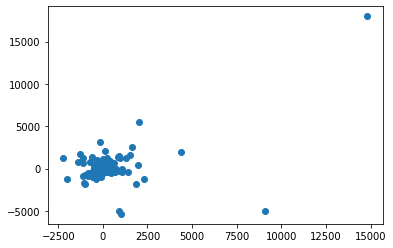

In [6]:
import pylab as pl
pl.scatter(virac['pmRA'], virac['pmDE'])

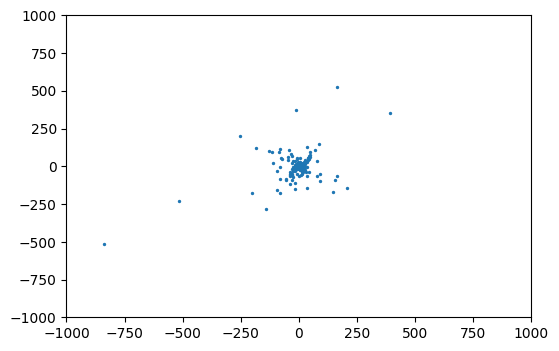

In [7]:
pl.figure(dpi=100)
sel = virac['pm'] > virac['e_pm']*5
pl.scatter(virac['pmRA'][sel], virac['pmDE'][sel], s=2)
pl.axis([-1000,1000,-1000,1000]);

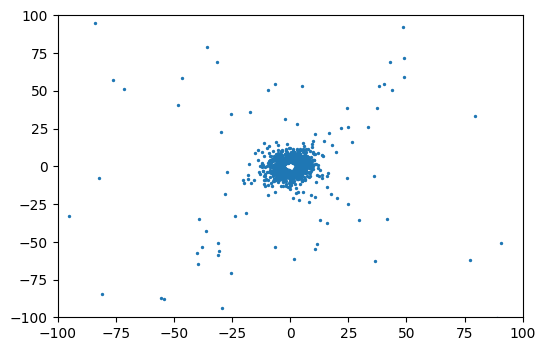

In [8]:
pl.figure(dpi=100)
sel = virac['pm'] > virac['e_pm']*5
pl.scatter(virac['pmRA'][sel], virac['pmDE'][sel], s=2)
pl.axis([-100,100,-100,100]);

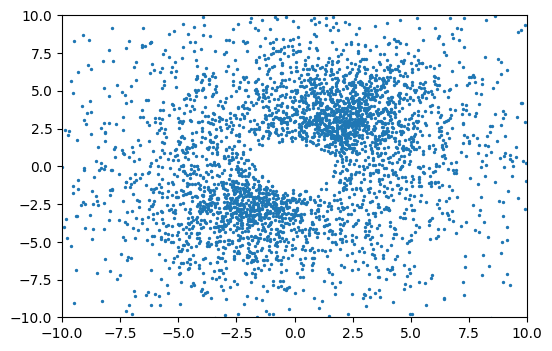

In [9]:
pl.figure(dpi=100)
sel = virac['pm'] > virac['e_pm']*3
pl.scatter(virac['pmRA'][sel], virac['pmDE'][sel], s=2)
pl.axis([-10,10,-10,10]);

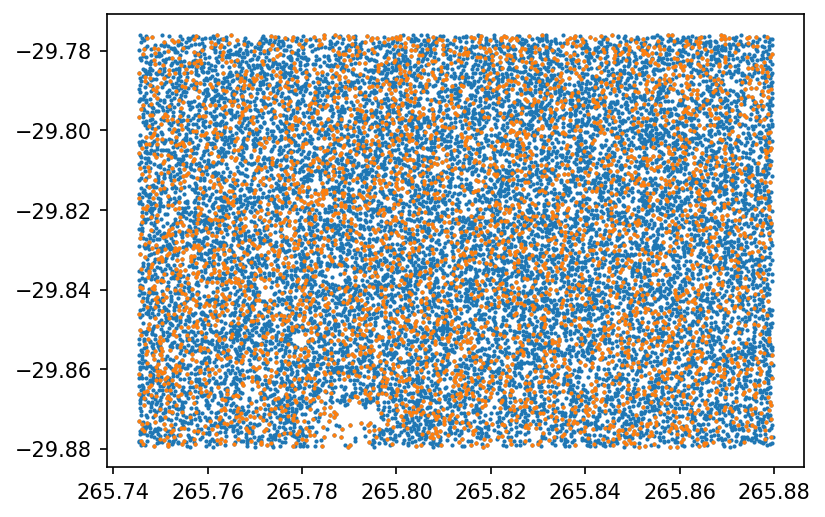

In [10]:
pl.figure(dpi=150)
pl.scatter(virac['RA_ICRS'], virac['DE_ICRS'], s=1)
pl.scatter(virac['RA_ICRS'][sel], virac['DE_ICRS'][sel], s=1)

Text(0, 0.5, 'K')

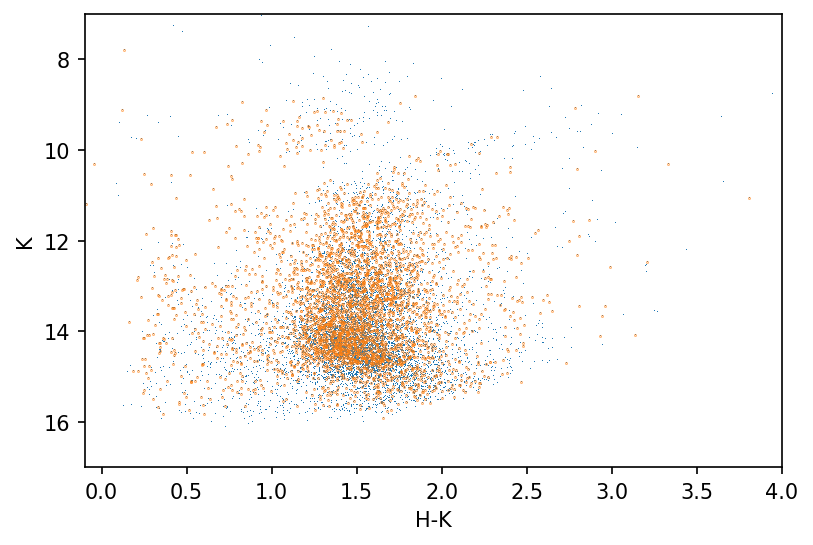

In [24]:
pl.figure(dpi=150)
pl.plot((virac['Hmag']-virac['Ksmag']), virac['Ksmag'], marker=',', linestyle='none')
pl.plot((virac['Hmag']-virac['Ksmag'])[sel], virac['Ksmag'][sel], marker='.', markersize=0.5, linestyle='none')
pl.xlim(-0.1, 4)
pl.ylim(17, 7);
pl.xlabel("H-K")
pl.ylabel("K")


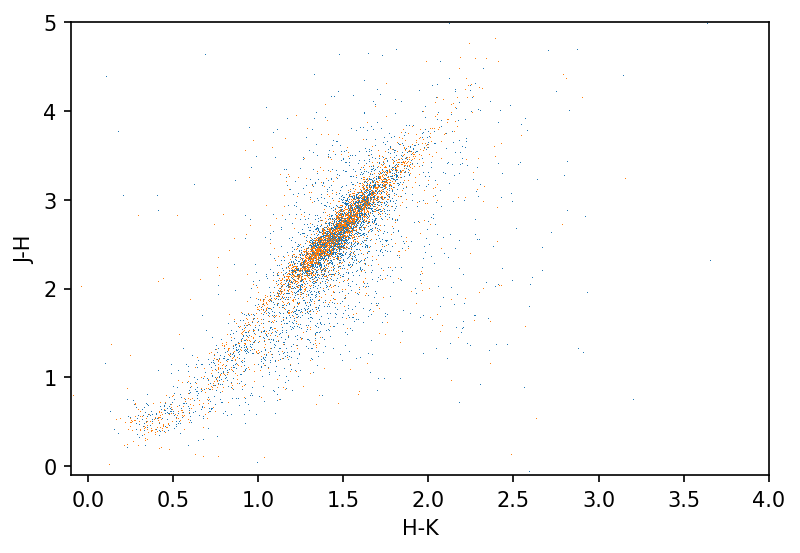

In [25]:

pl.figure(dpi=150)
pl.plot((virac['Hmag']-virac['Ksmag']), virac['Jmag'] - virac['Hmag'], marker=',', linestyle='none')
pl.plot((virac['Hmag']-virac['Ksmag'])[sel], (virac['Jmag'] - virac['Hmag'])[sel], marker=',', linestyle='none')
pl.xlim(-0.1, 4)
pl.ylim(-0.1, 5)
#pl.ylim(17, 7);
pl.xlabel("H-K")
pl.ylabel("J-H");

In [12]:
import numpy as np
from astropy import units as u

In [13]:
np.tan(20*u.deg)

<Quantity 0.36397023>

In [14]:
200*u.km/u.s * np.tan(20*u.deg)

<Quantity 72.79404685 km / s>

In [15]:
(72*u.km/u.s / (8.5*u.kpc)).to(u.mas/u.yr, u.dimensionless_angles())

<Quantity 1.78686658 mas / yr>

In [16]:
from astroquery.gaia import Gaia

Gaia.ROW_LIMIT = 10000
rslt = Gaia.query_object_async(coordinate=coord, width=width, height=height)

INFO: Query finished. [astroquery.utils.tap.core]


(array([  6.,  28., 133., 288.,  63.,  20.,   8.,   2.,   1.,   2.]),
 array([-1.90271186, -1.12701444, -0.35131701,  0.42438041,  1.20007784,
         1.97577526,  2.75147269,  3.52717011,  4.30286754,  5.07856496,
         5.85426239]),
 <BarContainer object of 10 artists>)

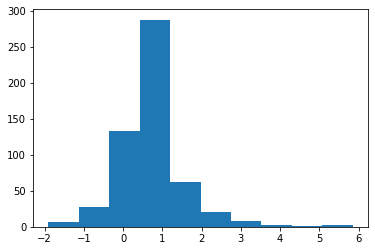

In [17]:
pl.hist(rslt['parallax'])